# Forward-forward ideas

Some ideas inspired by the forward-forward paper.

https://arxiv.org/abs/2212.13345


> The aim of this paper is to introduce a new learning procedure for neural networks
> and to demonstrate that it works well enough on a few small problems to be worth
> further investigation. The Forward-Forward algorithm replaces the forward and
> backward passes of backpropagation by two forward passes, one with positive
> (i.e. real) data and the other with negative data which could be generated by the
> network itself. **Each layer has its own objective function which is simply to have
> high goodness for positive data and low goodness for negative data. The sum of
> the squared activities in a layer can be used as the goodness but there are many
> other possibilities, including minus the sum of the squared activities.** If the positive
> and negative passes could be separated in time, the negative passes could be done
> offline, which would make the learning much simpler in the positive pass and
> allow video to be pipelined through the network without ever storing activities or
> stopping to propagate derivatives.

The "boring" movie that connects MLPs and RNNs

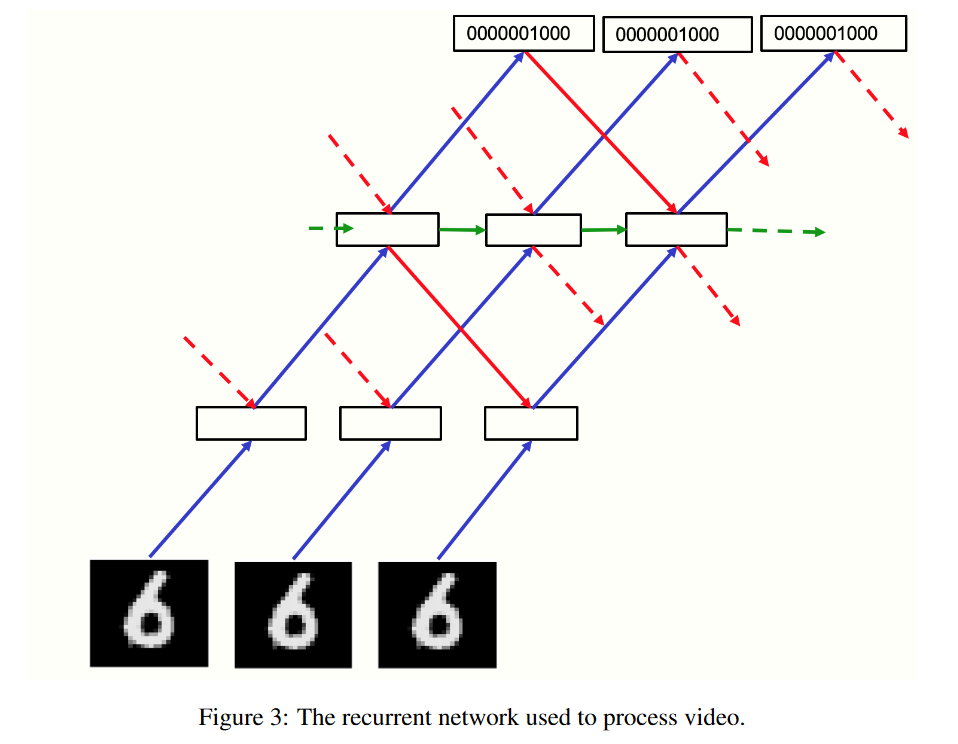

# My ideas

This seems to fit rather well with the dynamical system approach.  I mean, each layer/iteration can have its own objective function.   Such iteration by iteration training is a generalization of the forward-forward idea. 

For example, if $x$ is the input, $y$ is the output, and $h$ is the hidden state the we can write:

$$
\begin{bmatrix}
x_{t+1} \\
y_{t+1} \\
h_{t+1}
\end{bmatrix}
=
f_{\theta}
\left(
\begin{bmatrix}
x_t \\
y_t \\
h_t
\end{bmatrix}
\right)
$$

Then we can have the following kinds of objective functions.

If $y$ is the correct output for $x$ then we can have $h_{t+1}$ be small, and $y_{t+1}$ be close to $y$.  Note,
this can be thought of as the network begin "quiet" when $y$ is correct.

Note, I think that having $\|h_{t+1}-h_{t}\|$ be small is more general.  I.e., when the $y$ is correct then the network is "stationary" or "content".  When $y$ is incorrect then the network is "unstable" or "excited"
and the hidden state changes a lot (i.e., $\|h_{t+1}-h_{t}\|$ is large).

Similarily, if $y$ is close to $y_{true}$ then we want to have $\|y_{t+1}-y_{t}\|$ be small, but if $y$ is far from $y_{true}$ then we want $\|y_{t+1}-y_{t}\|$ to be large.

There are some interesting affects of this.  I mean, if we know, for a given $x$, what $y_{true}$ is then we can have many different objective functions.  If $\|y_{t} - y_{true}\|$ is small then we can have $\|h_{t+1}-h_{t}\|$ and $\|y_{t+1}-y_{t}\|$ be small.  If $\|y_{t} - y_{true}\|$ is large then we can have $\|h_{t+1}-h_{t}\|$ and $\|y_{t+1}-y_{t}\|$ be large.  This is a generalization of the forward-forward idea.

Just as in the forward-forward paper, negative examples have a much larger role to play.  I mean, if we have a negative example $x_t, y_t$ then we can have $\|h_{t+1}-h_{t}\|$ and $\|y_{t+1}-y_{t}\|$ be large.  This is a generalization of the forward-forward idea.

Note, this is also very efficient.  We don't need to wait for multi iterations before doing a gradient step.  we can do it after each iteration.

There is an interesting thing to consider here.  Suppose, I have a negative example $x_t, y_t$, do I want $\|h_{t+1}-h_{t}\|$ to be large for all $h_{t}$?  I mean, do I want $\|h_{t+1}-h_{t}\|$ to be large no matter what the time history of the training is?   I suspect the answer is "yes", since the pair $x_t, y_t$ is wrong no matter how I got here.

It is interesting that the "pre-training" of the algorithm really revolves around making sure it has no fixed points.  I.e., if all you know are negative examples, and you haven't seen any positive examples, then you want to make sure that the network is not "content" or "stationary" at any point.  I.e., you want to make sure that $\|z_{t+1}-z_{t}\|$ is large for all $z_{t}$.

<!--  -->